# K-Nearest Neighbor (KNN) Classification
### Example Case: Mouse Dataset

KNN is a learning algorithm used for classification (and regression).
It classifies an input data point based on the class of its k-nearest neighbors in the feature space. The optimal value of k depends on the data and problem being solved, and can be empirically determined using cross-validation techniques.
It is a lazy learner, meaning that it does not require training data to build a model.
Its performance depends on the choice of k and the characteristics of the data.

Below is a simple example of KNN. 

In [1]:
##### LOAD THE DATA
import pandas as pd
url = ("https://raw.githubusercontent.com/Actionable-Data-Science/Data-Analytics-Course/main/mouse.csv")
#url = "mouse.csv"
dfMouse = pd.read_csv(url, header=0)
dfMouse.head()

,x,y,class
0,0.456601,0.432806,Head
1,0.611378,0.528625,Head
2,0.450299,0.711606,Head
3,0.639015,0.460744,Head
4,0.628957,0.323470,Head


In [2]:
##### Check the existing classes
dfMouse["class"].unique()

array(['Head', 'Ear_left', 'Ear_right', 'Noise'], dtype=object)

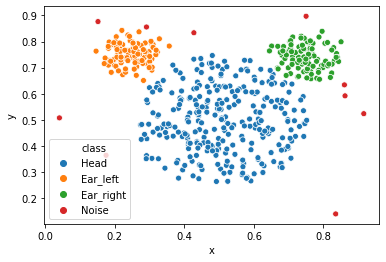

In [8]:
##### VISUALIZE THE DATA 
import matplotlib.pylab as plt
import seaborn as sns
sns.scatterplot('x', 'y', data=dfMouse, hue='class')
plt.show()

In [9]:
##### PREPARE THE DATA FOR MODELING
from sklearn.model_selection import train_test_split

X = dfMouse.drop("class", axis=1)
X = X.values
y = dfMouse["class"]
y = y.values

##### SPLIT INTO TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100001)

In [10]:
##### TRAIN A KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
##### USE THE TRAINED CLASSIFIER ON NEW DATA
new_x = 0.05
new_y = 0.8
new_point = [(new_x, new_y)]

## Predict
prediction = knn_model.predict(new_point)

## Add the prediction into the dataset (for visualization)
dfMousePred = dfMouse.copy()
dfMousePred['source'] = 'original'
dfMousePred = dfMousePred.append(pd.DataFrame([[new_x, new_y, prediction[0], 'new']], columns=dfMousePred.columns))
dfMousePred.tail()

,x,y,class,source
496,0.860308,0.633833,Noise,original
497,0.862083,0.591805,Noise,original
498,0.916030,0.523391,Noise,original
499,0.427325,0.833767,Noise,original
0,0.050000,0.800000,Ear_left,new


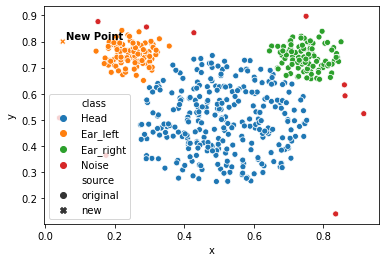

In [20]:
sns.scatterplot('x', 'y', data=dfMousePred, hue='class', style='source', markers=['o', 'X'])
plt.text(new_x+0.01, new_y+0.01, "New Point", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()